In [66]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [67]:
signal = sp.io.loadmat("prepared_DOV_4_Slava.mat")
signal

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Aug 31 18:46:00 2022',
 '__version__': '1.0',
 '__globals__': [],
 'PDerr': array([[ 0.00040764-6.89908047e-05j, -0.00053928+1.15335795e-04j,
          0.00059438-1.55249858e-04j, ..., -0.00072118-3.90655652e-04j,
         -0.00151281+3.30823683e-03j, -0.00050606+8.53548234e-04j]],
       dtype=complex64),
 'PDinRef': array([[-0.06523132-0.37695007j, -0.26933289-0.65573425j,
         -0.27095642-0.46867981j, ...,  0.14130554-0.21737976j,
         -0.05061951-0.13069458j, -0.22010498-0.1190979j ]]),
 'PDin_E': array([[-0.05730783-0.33116285j, -0.23661766-0.57608378j,
         -0.23804399-0.41175039j, ...,  0.12414149-0.19097516j,
         -0.04447088-0.11481942j, -0.19336935-0.10463136j]]),
 'PDin_O': array([[-0.14757403-0.50140531j, -0.27344749-0.54231036j,
         -0.14696275-0.20620631j, ...,  0.06515264-0.14309128j,
         -0.16285612-0.11594011j, -0.10768778-0.0548627j ]]),
 'PDdesired': array([[ 0.00330853

In [68]:
signal['PDinRef'].shape

(1, 170000)

In [69]:
signals = {
    'PDerr'     : signal['PDerr'][0],
    'PDinRef'   : signal['PDinRef'][0],
    'PDin_E'    : signal['PDin_E'][0],
    'PDin_O'    : signal['PDin_O'][0],
    'PDdesired' : signal['PDdesired'][0],
}

In [70]:
def plot_abs(*signals):
    """
    Plots absolute values of given signals

    Parameters:
    ----------
    signals: 
        dictionary of signals to plot absolte values, 
        format: {"name_1": signal_1, "name_2": signal_2, ...}
    """
    
    plt.figure()
    for name, s in signals[0].items():
        plt.plot(abs(s), label=name, lw=0.3)

    plt.legend()
    plt.grid('both')
    plt.xlim([0, None])
    plt.ylim([0, None])
    plt.show()

In [71]:
def plot_psd_complex(*signals, fs:float, N:int=2048, window:str='hann'):
    """Compute PSD of multiple signals using Welch method and plot them

    Parameters
    ----------
    signals : 
        dictionary of signals to compute PSD, 
        format: 
        1st variant: {("name_1", ls, lw, marker, markersize): signal_1, ("name_2", ls, lw, marker, markersize): signal_2, ...}
        2nd variant: {"name_1": signal_1, "name_2": signal_2, ...}, format can be choosen separately for each plot
    fs : float
        sampling frequency [MHz]
    N : int, optional
        window size, by default 2048
    window : str, optional
        window type (windows are taken from `sp.signal.windows`), by default 'hann'
    """

    # defaults
    ls = '-'
    lw = 0.3
    marker = '.'
    markersize = 0.5

    plt.figure()
    plt.xlabel('Freq [MHz]')
    plt.ylabel('Power Spectrum [dB]')
    for info, s in signals[0].items():
        if type(info) != tuple:
            info = (info, ls, lw, marker, markersize)

        # default detrend removes dc 
        f_psd, signal_psd = sp.signal.welch(x=s, fs=fs, scaling='spectrum', return_onesided=False, detrend=False, window=sp.signal.get_window(window, N))
        arg_sort = np.argsort(f_psd)
        plt.plot(f_psd[arg_sort], 10*np.log10(signal_psd[arg_sort]), label=info[0], ls=info[1], lw=info[2], marker=info[3], markersize=info[4])

        # f_psd, signal_psd = sp.signal.periodogram(x=s, fs=fs, scaling='spectrum', return_onesided=False)
        # plt.plot(f_psd, 10*np.log10(signal_psd), label=name, lw=0.3, marker='.', markersize=0.5)

    plt.legend()
    plt.grid('both')
    plt.show()

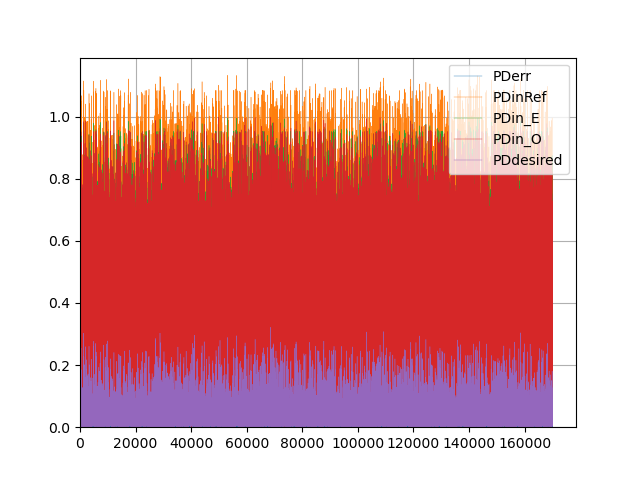

In [72]:
plot_abs(signals)

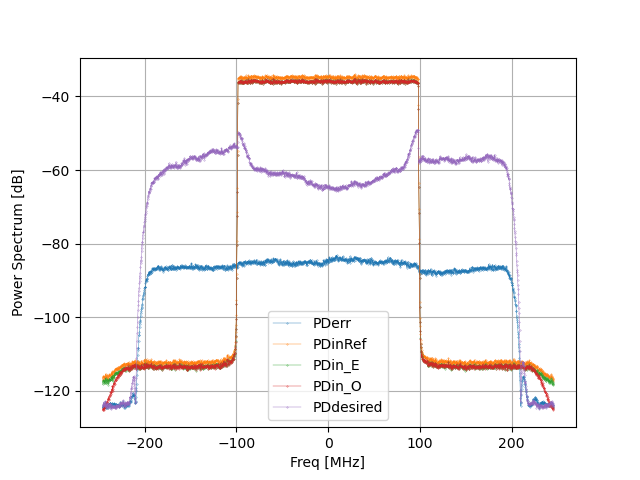

In [73]:
plot_psd_complex(signals, fs=4*122.88)